# 02 - Returns Analysis

In this notebook, we compute and explore daily **log returns** from adjusted close prices. Log returns are preferred over simple returns in quantitative finance due to their **time-additive** (i.e., you can sum them over time) properties and more stable statistical behavior.

The log return between two consecutive days is:
$$
r_t = ln(\frac{P_t}{P_{t-1}})
$$
Where: 
- $P_t$ = adjusted close price on day t
- ln = natural logarithm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure plots render in notebook
%matplotlib inline

# Load the adjusted close prices saved from notebook 01
prices = pd.read_csv("../results/adj_close.csv", index_col=0, parse_dates=True)
prices.head()

,AAPL,GOOGL,MSFT,SPY
Date,,,,
2020-01-02,72.620850,68.026031,153.042313,300.291565
2020-01-03,71.914818,67.670151,151.136642,298.017670
2020-01-06,72.487854,69.473846,151.527313,299.154694
2020-01-07,72.146927,69.339645,150.145737,298.313446
2020-01-08,73.307510,69.833183,152.537292,299.903412


We compute the daily log returns for each asset and drop the first `NaN` row:

In [3]:
log_returns = np.log(prices / prices.shift(1)).dropna()
log_returns.head()

,AAPL,GOOGL,MSFT,SPY
Date,,,,
2020-01-03,-0.009770,-0.005245,-0.012530,-0.007601
2020-01-06,0.007937,0.026305,0.002582,0.003808
2020-01-07,-0.004714,-0.001934,-0.009159,-0.002816
2020-01-08,0.015958,0.007092,0.015803,0.005316
2020-01-09,0.021019,0.010443,0.012416,0.006758


We can then visualize these returns with a Line Plot

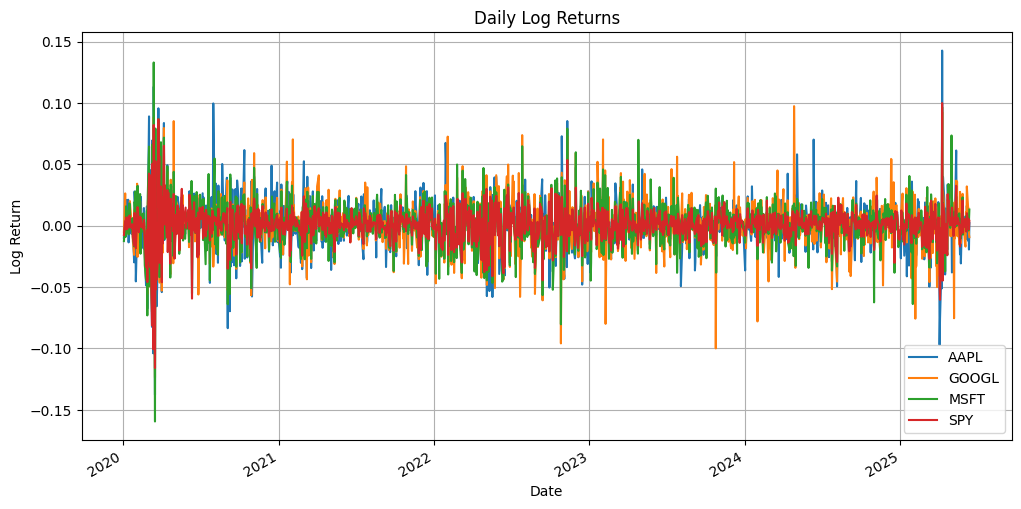

In [4]:
log_returns.plot(figsize=(12, 6), title="Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.show()

And view the Average Daily Log Return for each asset:

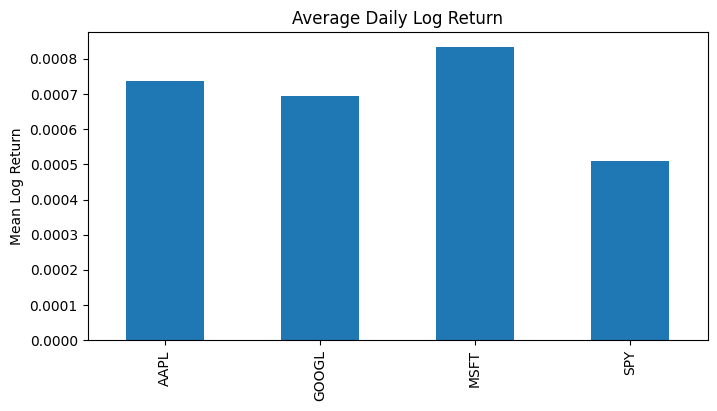

In [ ]:
log_returns.mean().plot(kind='bar', title="Average Daily Log Return", figsize=(8, 4))
plt.ylabel("Mean Log Return")
plt.show()

## Exploring Asset Correlations

Although the portfolio optimization process relies on the **covariance matrix** to calculate portfolio risk, the **correlation matrix** provides a more interpretable view of the relationships between asset returns.

Correlation values range from -1 to 1:
- A value close to **1** indicates that two assets tend to move in the **same direction**.
- A value close to **-1** indicates that they tend to move in **opposite directions**.
- A value near **0** implies **low or no linear relationship** between the assets.

By visualizing the correlation matrix, we can quickly identify:
- Assets that move together (which may not add diversification)
- Assets that are relatively uncorrelated (which are useful for reducing portfolio risk)

This step helps us understand potential **diversification benefits** before performing optimization.

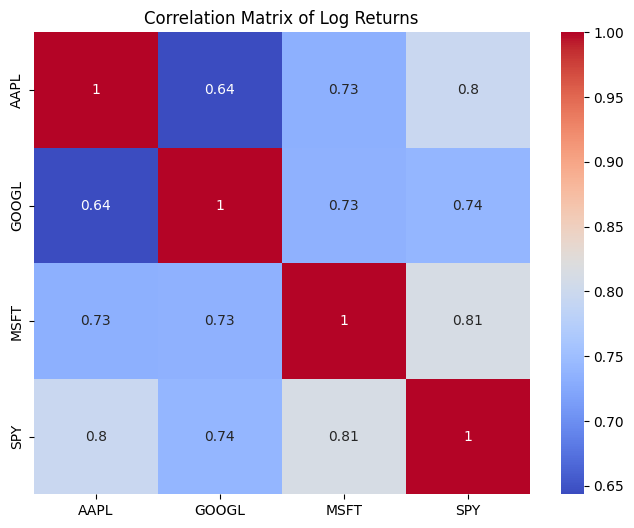

In [6]:
import seaborn as sns

correlation = log_returns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Log Returns")
plt.show()


## Calculating Mean Returns and Covariance Matrix

To prepare for portfolio optimization, we calculate two key statistics from the log returns:

- **Mean returns** represent the average daily return for each asset. These will be used to estimate the expected return of a portfolio based on asset weights.

- **Covariance matrix** captures how pairs of asset returns move together in absolute terms. This matrix is essential for computing overall portfolio risk (variance), which is a core component of portfolio optimization.

Unlike the correlation matrix (which only shows the *strength* and *direction* of relationships), the covariance matrix preserves the **magnitude** of returns and is used directly in optimization calculations.

These two components — expected returns and covariances — form the mathematical foundation for generating and optimizing portfolios in the next stages of the project.

In [8]:
mean_returns = log_returns.mean()
cov_matrix = log_returns.cov()

We can then also save these results, along with the log_returns to a csv as well.

In [9]:
log_returns.to_csv("../results/log_returns.csv")
mean_returns.to_csv("../results/mean_returns.csv")
cov_matrix.to_csv("../results/cov_matrix.csv")

## Summary

In this notebook, we performed an exploratory analysis of daily log returns for the selected assets:

- **Computed daily log returns** from adjusted closing prices.
- **Visualized return behavior** over time to observe volatility and general trends.
- **Displayed the correlation matrix** to understand relationships between assets and assess diversification potential.
- **Calculated the mean returns and covariance matrix**, which are the key inputs for portfolio optimization models.

These statistics will be used in the next notebook to simulate random portfolios and explore the risk-return landscape under Modern Portfolio Theory.
